In [ ]:
import pandas as pd
import spacy
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/labeled_data.csv')

In [ ]:
df.shape

(24783, 7)

In [ ]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [ ]:
df.drop(columns = ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'],
        inplace = True)

In [ ]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.isna().sum()

,0
class,0
tweet,0


In [ ]:
df['tweet'].iloc[0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [ ]:
df['tweet'].iloc[1000]

'&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;"@betysweetcocker: That pussy is just....&#128561; imma assume she just had a baby like..the day before"'

In [ ]:
df['processed_tweet'] = df['tweet'].str.replace(r'[^a-zA-Z]', ' ', regex = True)

In [ ]:
df.head()

,class,tweet,processed_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...


In [ ]:
df['processed_tweet'].iloc[800]

' WhatImCraving Peanut Butter Oreos  lt  '

In [ ]:
df['processed_tweet_2'] = df['processed_tweet'].str.replace(r'[\s]+', ' ', regex= True)

In [ ]:
df.head()

,class,tweet,processed_tweet,processed_tweet_2
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...,RT mayasolovely As a woman you shouldn t comp...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...,RT C G Anderson viva based she look like a tr...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...,RT ShenikaRoberts The shit you hear about me ...


In [ ]:
df['processed_tweet_2'].iloc[800]

' WhatImCraving Peanut Butter Oreos lt '

In [ ]:
df.drop(columns=['tweet', 'processed_tweet'], inplace = True)

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def lemmatization(text):
  doc = nlp(text)
  lemmaList = [word.lemma_ for word in doc]
  return ' '.join(lemmaList)

In [ ]:
df['lemma_tweet'] = df['processed_tweet_2'].apply(lemmatization)

In [ ]:
df.head()

,class,processed_tweet_2,lemma_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...


In [ ]:
df['processed_tweet_2'].iloc[67]

' Allyhaaaaa Lemmie eat a Oreo amp do these dishes One oreo Lol'

In [ ]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [ ]:
def remove_stopwords(text):
  doc = nlp(text)
  no_stopwords_list = [word.text for word in doc if not word.is_stop]
  return ' '.join(no_stopwords_list)

In [ ]:
df['final_tweet'] = df['lemma_tweet'].apply(remove_stopwords)

In [ ]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [ ]:
df['final_tweet'].iloc[67]

'   Allyhaaaaa Lemmie eat Oreo amp dish oreo lol'

In [ ]:
df.head()

,class,processed_tweet_2,lemma_tweet,final_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,RT ShenikaRoberts shit hear true faker bitc...


In [ ]:
vocab_size = 1000000
one_hot_repr = [one_hot(words, vocab_size) for words in df['final_tweet']]

In [ ]:
for i in range(0, 4):
  print(df['final_tweet'].iloc[i])

   RT mayasolovely woman shouldn t complain clean house amp man trash
   RT mleew boy dat cold tyga dwn bad cuffin dat hoe st place
   RT UrKindOfBrand Dawg RT sbaby life fuck bitch start cry confuse shit
   RT C G Anderson viva base look like tranny


In [ ]:
for i in range(0, 4):
  print(one_hot_repr[i])

[723243, 169389, 592829, 232362, 371471, 263114, 440412, 417679, 932148, 621066, 320006]
[723243, 700642, 924026, 958346, 346537, 545982, 568594, 746887, 16968, 958346, 631813, 712526, 108621]
[723243, 514948, 187982, 723243, 418752, 567923, 878348, 720607, 501676, 158705, 407234, 855417]
[723243, 731373, 899443, 335155, 481382, 358671, 293987, 294705, 691244]


In [ ]:
sentence_length = 20
embedded_tweet = pad_sequences(one_hot_repr, padding = 'pre', maxlen = sentence_length)

In [ ]:
for i in range(0, 4):
  print(embedded_tweet[i])

[     0      0      0      0      0      0      0      0      0 723243
 169389 592829 232362 371471 263114 440412 417679 932148 621066 320006]
[     0      0      0      0      0      0      0 723243 700642 924026
 958346 346537 545982 568594 746887  16968 958346 631813 712526 108621]
[     0      0      0      0      0      0      0      0 723243 514948
 187982 723243 418752 567923 878348 720607 501676 158705 407234 855417]
[     0      0      0      0      0      0      0      0      0      0
      0 723243 731373 899443 335155 481382 358671 293987 294705 691244]


In [ ]:
x = np.array(embedded_tweet)
y = np.array(df['class'])

In [ ]:
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [ ]:
smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x, y)

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x.shape, X_train.shape, X_test.shape

((42543, 20), (34034, 20), (8509, 20))

In [ ]:
#creating model
dimension = 50

model = keras.Sequential([
    #embedding layer
    keras.layers.Embedding(vocab_size, dimension),
    #LSTM Layers (stacked)
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),
    #output layer
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 854s 794ms/step - accuracy: 0.7742 - loss: 0.5063
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 827s 777ms/step - accuracy: 0.9585 - loss: 0.1302
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 840s 789ms/step - accuracy: 0.9797 - loss: 0.0691
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 810s 759ms/step - accuracy: 0.9874 - loss: 0.0411
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 866s 764ms/step - accuracy: 0.9921 - loss: 0.0275
Epoch 6/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 827s 777ms/step - accuracy: 0.9945 - loss: 0.0186
Epoch 7/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 874s 789ms/step - accuracy: 0.9943 - loss: 0.0171
Epoch 8/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 834s 764ms/step - accuracy: 0.9956 - loss: 0.0144
Epoch 9/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 898s 797ms/step - accuracy: 0.9965 - loss: 0.0105
Epoch 10/10
 798/1064 ━━━━━━━━━━━━━━━━━━━━ 3:37 818ms/step - accuracy: 0.9970 - loss: 0.0089

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100}')

266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8840 - loss: 0.5761
Model Accuracy: 88.3417546749115


In [ ]:
pred = np.argmax(model.predict(X_test), axis = -1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step


In [ ]:
y_test[:5]

array([1, 1, 0, 1, 2])

In [ ]:
pred[:5]

array([1, 1, 0, 1, 2])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3812
           1       0.91      0.93      0.92      3807
           2       0.61      0.82      0.70       890

    accuracy                           0.88      8509
   macro avg       0.82      0.87      0.84      8509
weighted avg       0.90      0.88      0.89      8509



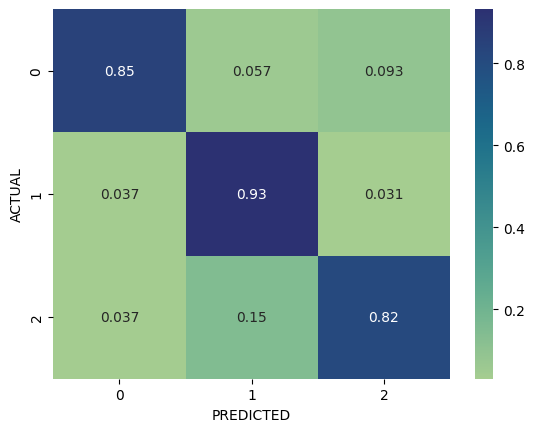

In [ ]:
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot=True, cmap='crest');
plt.xlabel('PREDICTED');
plt.ylabel('ACTUAL');